![training](assets/training-basics/puppy-training.jpg)

(image: amazon)

# Training basics

Concepts in training models
- Loss functions
- Gradient descent
- Overfitting, underfitting
- Regularization
- Cross-validation

Objective: a model that trains fast and performs well

Not an exhaustive list. We'll encounter more as we go over the different algorithms.

## 1. Loss Functions

What they are: a metric of how far away the predictions are from the truth

For example:

![MSE](http://scikit-learn.org/stable/_images/math/44f36557fef9b30b077b21550490a1b9a0ade154.png)

a.k.a.:
- Objective function
- Cost function
- Error function

### Definitions

$$x^* = \arg \min L(x)$$

where $x^*$ = value that minimizes the loss function $L(x)$

The process of finding $x^*$ is called "Optimization". It usually involves running some type of Gradient Descent. 

### Loss Function Examples

Scikit-learn:
- [Mean squared error](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error): `sklearn.metrics.mean_squared_error(y_true, y_pred)`
- [Log loss](http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss): `sklearn.metrics.log_loss(y_true, y_pred)`
- [Zero one loss](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.zero_one_loss.html#sklearn.metrics.zero_one_loss)
`sklearn.metrics.zero_one_loss(y_true, y_pred)`
- etc

Keras:
- https://keras.io/losses/
- `keras.losses.mean_squared_error(y_true, y_pred)`
- `keras.losses.binary_crossentropy(y_true, y_pred)`
- etc

## 2. Gradient Descent

What it is: technique for minimizing loss function for a given model

Objective: find $w^*$ such that $$w^* = \underset{w}\arg \min{L\big(y_{true}, y_{pred}\big)}$$

$$w^* = \underset{w}\arg \min{L\big(y_{true}, f(x, w)\big)}$$


where
- $L(...)$ is the loss function
- $w$ are the weights
- $f(x, w)$ is the model that computes $y_{pred}$

### Gradient descent algorithm

1. Initialize $w$ to some value (e.g. random)
2. Compute gradient of $L\big(y_{true}, f(x, w)\big)$
3. Update $w$ by a "tiny factor" in the negative of the gradient
4. Repeat 2-3 until we reach the "stopping criteria" (more on this later)

The "tiny factor" is known as the "learning rate"

### Workshop: Gradient descent. Animated

![wake up](assets/training-basics/descend.jpg)

(training incantation)

### Environment Setup

Create a new environment called `mldds02`. You may also reuse `mldds01`, but it's good to keep separate environments for different experiments.

```
conda create -n mldds02 python=3
conda activate mldds02

(mldds02) conda install jupyter numpy pandas matplotlib scikit-learn
(mldds02) conda install -c conda-forge ffmpeg
```

In [ ]:
# Credits: https://jed-ai.github.io/py1_gd_animation/

import numpy as np
import matplotlib.pyplot as plt

"""Example gradient descent implementation"""

def func_y(x):
    """A demonstrative loss function that happens to be convex (has global a minimum)
    Args:
        x - the input (can be the weights of a machine learning algorithm)
    Returns:
        The loss value
    """
    return x**2 - 4*x + 2

def gradient_func_y(x):
    """The gradient of func_y
    Args:
        x - the input
    Returns:
        The gradient value
    """
    return 2*x - 4 # d(x^2 - 4x + 2)/dx = 2x - 4

def gradient_descent(previous_x, learning_rate, epochs):
    """An implementation of gradient descent
    Args:
        previous_x - the previous input value
        learning_rate - how much to change x per iteration
        epochs - number of steps to run gradient descent
    Returns:
        A tuple: array of x values, array of loss values
    """
    x_gd = []
    y_gd = []
    x_gd.append(previous_x)
    y_gd.append(func_y(previous_x))
    
    # loop to update x and y
    for i in range(epochs):
        # x = lr * gradient(func(prev_x))
        update = learning_rate *gradient_func_y(previous_x)
        x = previous_x - update
        print('step', i, 'previous x', previous_x,
              'update:', -update, 'new x:', x)
        x_gd.append(x)
        y_gd.append(func_y(x))
        
        # update previous_x
        previous_x = x
    
    return x_gd, y_gd

With gradient descent implemented, we'll will now run it.

In [ ]:
x0 = 0.7
learning_rate = 0.15
epochs = 10

x = np.arange(-1, 5, 0.01)
y = func_y(x)
x_gd, y_gd = gradient_descent(x0, learning_rate, epochs)

Plot the animation.

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots()
ax.set_xlim([min(x), max(x)])
ax.set_ylim([min(y)-1, max(y)+1])
ax.plot(x, y, lw = 0.9, color = 'k')

line, = ax.plot([], [], 'r', label = 'Gradient descent', lw = 1.5)
point, = ax.plot([], [], 'bo', animated=True)
value_display = ax.text(0.02, 0.02, '', transform=ax.transAxes)

def init():
    """Initializes the animation"""
    line.set_data([], [])
    point.set_data([], [])
    value_display.set_text('')

    return line, point, value_display

def animate(i):
    """Animates the plot at step i
    Args:
        i: the step to animate
        return: a tuple of line, point, and value_display
    """
    # Animate line
    line.set_data(x_gd[:i], y_gd[:i])
    
    # Animate points
    point.set_data(x_gd[i], y_gd[i])

    # Animate value display
    value_display.set_text('Min = ' + str(y_gd[i]))

    return line, point, value_display

# call the animator
rc('animation', html='html5')
anim = FuncAnimation(fig, animate, init_func=init,
                     frames=len(x_gd), interval=360,
                     repeat_delay=60, blit=True)

# display the video
HTML(anim.to_html5_video())

### Exercises

1. Try initializing x0 to something > 2, what do you observe?
2. Try increasing the learning_rate to something large like 10. Does the gradient still converge?
3. Replace func_y and gradient_func_y above with a cubic function. What do you observe?
  ```
  y = x^3 - 5x^2 + x + 1
  gradient(y) = 3x^2 - 10x + 1
  ```
4. Replace func_y and gradient_func_y with `cos(x)` and its derivative `-sin(x)`. What do you observe?  What needs to reach convergence?
  ```
  y = np.tan(x)
  gradient(y) = -np.sin(x)
  ```
  
Derivative formulas: https://www.derivative-calculator.net/

### Gradient Descent Variants

1. Stochastic Gradient Descent (SGD)
2. Minibatch SGD
3. Minibatch SGD with Momentum
4. Adaptive Learning Rates

### Stochastic Gradient Descent

"Regular" Gradient Descent is expensive because it processes all samples at once
- Imagine you have millions of training samples

Stochastic Gradient Descent speeds this up by:
- Running gradient descent, one randomly selected training sample at a time
- Stochastic: random noise, because samples can vary a lot

### Notation

$\leftarrow$ = replace value
Some texts use this symbol $:=$

Examples
- $\theta \leftarrow \theta - \epsilon g$
- $\theta := \theta - \epsilon g$

Means
1. Compute $\theta' = \theta - \epsilon g$
2. Update $\theta = \theta'$

![sgd](assets/training-basics/sgd.png)

Symbols:
- The $\eta_t$ denotes the learning rate
- Note: $\Theta$ is denotes the weights matrix

(image: Neural Networks in Natural Language Processing, Goldberg, 2017)

### Minibatch Stochastic Gradient Descent

Instead of 1 random sample at a time:
- Sample a "minibatch" of m training samples
- Run gradient descent on that minibatch
- "Smooths" out the randomness by operating on a minibatch.
- The minibatch size can be tuned ("hyperparameter")

![minibatch sgd](assets/training-basics/minibatch-sgd.png)

Symbols:
- $\epsilon_k$ denotes the learning rate
- $\theta$ denotes the weights matrix
- $\nabla_{\theta}$ means gradient w.r.t. $\theta$

(image: Deep Learning, Goodfellow, 2016)

### Minibatch SGD, with momentum

Speeds up minibatch SGD by:
- Applying an exponentially decaying moving average of the previous gradients ($v$)
  - if gradients point the same way, will reach minimum faster
- Minibatch SGD: $\theta \leftarrow \theta - \epsilon g$
- Minibatch SGD + momentum: $\theta \leftarrow \theta - \epsilon g + \alpha v$, $v \leftarrow v - \epsilon g$

Variant: Nesterov's momentum

![minibatch sgd with momentum](assets/training-basics/minibatch-sgd-momentum.png)

(image: Deep Learning, Goodfellow, 2016)

### Adaptive Learning Rate Strategies

- Learning rate will control the amount of gradient update
  - Large learning rate: risk overshoot and not converge
  - Small learning rate: too slow
  - Ideal: start large(r), then reduce as we get closer to minima
- Strategies
  - Constant learning rate
  - Time-based or step-based decay
  - AdaGrad
  - RMSProp
  - Adam
- What works best depends on your domain (true for **any** optimization)

![Comparison](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/05/Comparison-of-Adam-to-Other-Optimization-Algorithms-Training-a-Multilayer-Perceptron.png)

(image: [machine learning mastery](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning)

![Another comparison](http://scikit-learn.org/stable/_images/sphx_glr_plot_mlp_training_curves_001.png)

(image: [scikit-learn](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html))

## Overfitting and Underfitting

### Generalization

- Model is trained based on the training set
- Generalization is evaluated on the test set

Generalization: "How well does model work, on inputs not seen during training"

### Goals of training a model
1. Minimize training error
2. Minimize gap between test error and training error. (the "generalization gap")

(Reference: Deep Learning - Goodfellow, Bengio, Courville, MIT press, 2016)

### Underfitting, Overfitting

1. A model is set to "underfit" if the training error is too large
2. A model is set to "overfit" if the gap between test and training error is too large

A good-fit model: neither underfit nor overfit (Goldilocks and the Three Bears)

### Underfit

A model is set to "underfit" if the training error is too large
  - Means model does not work
  - It learnt nothing
  - Mode has "high bias"

### Overfit

A model is set to "overfit" if the gap between test and training error is too large
  - Means model does not generalize well
  - It only learnt the training set (or learnt too much training set noise)
  - Model has "high variance"

![comics](https://imgs.xkcd.com/comics/linear_regression.png)

(image: xkcd)

### How to fix Underfitting

Symptom: model did not train well

Potential cures:
- More data
- More features and/or different features
- Different algorithms

### How to fix Overfitting

Symptom: model trained well, but did not test well

Potential cures:
- Early stoppping
- Fewer features
- Regularization
- Cross Validation

## Workshop: SGD, Overfitting, Underfitting

In this workshop, we will try to fit a more complex linear regression model.

We'll explore the following concepts:
- Loss functions
- Stochastic Gradient Descent
- Underfitting and Overfitting

Inspiration:
https://sdsawtelle.github.io/blog/output/week6-andrew-ng-machine-learning-with-python.html

### Prediction Tasks

We'll try to fit a curve to predict, for recent Singapore University Graduates:
```
y: Gross Monthly Median Salary (S$)
x: Overall Employment Rate (%)
```

To illustrate underfitting/overfitting, we'll explore:
- A first-order linear model: $y = w^Tx$
- A linear model with polynomial features
$$y = w^TX$$
where $X = [1, x, x^2, x^3, ...]$

We'll also explore different loss functions and plotting of loss curves during training.

### Dataset(s)

1. Download this dataset: https://data.gov.sg/dataset/graduate-employment-survey-ntu-nus-sit-smu-sutd
2. Unzip it and note the path for use in `pandas.read_csv`

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 1. Data Transformation and Cleaning

The first step is to inspect the data to see what transformation/cleaning is needed.

In [80]:
# ISO-8859-1 encoding is needed
#   UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe4 in position 20: invalid continuation byte

df = pd.read_csv('D:/tmp/graduate-employment-survey-ntu-nus-sit-smu-sutd/graduate-employment-survey-ntu-nus-sit-smu-sutd.csv',
                 encoding='ISO-8859-1',
                 usecols=['university', 'employment_rate_overall', 'gross_monthly_median'])

# filter by NUS to keep things simple
df = df.loc[df.university == 'National University of Singapore']

df.columns

Index(['university', 'employment_rate_overall', 'gross_monthly_median'], dtype='object')

The columns to inspect are:
- employment_rate_overall
- gross_monthly_median

We are looking for:
- invalid values
- data types to transform to numeric
- feature ranges

In [58]:
# the sample size is fairly small, we can inspect using .unique()
print(df.describe())
print('')
print(df.employment_rate_overall.unique())

                              university employment_rate_overall  \
count                                118                     118   
unique                                 1                      74   
top     National University of Singapore                      na   
freq                                 118                      15   

       gross_monthly_median  
count                   118  
unique                   47  
top                    3000  
freq                     16  

['84.8' '86.6' '88.1' '88.7' '94.6' '93.3' '97.2' '88.9' 'na' '92.4'
 '89.2' '100' '82.1' '96.8' '74' '93.2' '96.1' '88.5' '86.2' '93.8' '93.9'
 '90.9' '89.1' '98.8' '97.5' '97.3' '80.9' '83.6' '96.4' '81.9' '83.1'
 '87.9' '94.4' '90.6' '85.7' '95.5' '98.4' '77.3' '95.3' '93.1' '87.5'
 '83.9' '97.1' '95.2' '81.3' '96.5' '78.6' '90' '98.2' '76.8' '98.9'
 '88.4' '83' '88.6' '88.2' '96' '97.6' '98.6' '92.6' '97' '90.3' '72'
 '94.3' '86' '91.8' '92.1' '82.6' '83.3' '96.9' '82.4' '85.2' '84.3' '99'
 '71.9']


`employment_rate_overall` column
- invalid values: yes, there is an 'na' value above
- data type is object (these are string values)
  - need to transform to numbers
  - How: use [pandas.to_numeric](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_numeric.html) to convert to numbers
- range: 0-100

If the dataset is large, it is hard to find the 'na' values.

A quick test is to try converting the column first, to see if errors appear.

In [59]:
pd.to_numeric(df.employment_rate_overall) # see if we get parse errors

ValueError: Unable to parse string "na" at position 8

We will be using the `errors='coerce'` option in [pandas.to_numeric](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_numeric.html) when we do the actual conversion.

In [60]:
pd.to_numeric(df.employment_rate_overall, errors='coerce') # 'na' becomes NaN

34      84.8
35      86.6
36      88.1
37      88.7
38      94.6
39      93.3
40      97.2
41      88.9
42       NaN
43       NaN
44      92.4
45      88.9
46      89.2
47     100.0
48       NaN
49      82.1
50      96.8
51      89.2
52      74.0
53      93.2
54      96.1
55      88.9
56      88.5
57      86.2
58      93.8
59      93.9
60      90.9
61      89.1
62      98.8
63     100.0
       ...  
243     97.0
244     90.3
245     97.2
246    100.0
247     97.6
248     72.0
249     94.3
250     93.9
251     86.2
252     86.0
253     96.5
254     91.8
255     92.1
256     82.6
257     88.1
258     96.1
259    100.0
260     83.3
261     96.9
262    100.0
263     97.3
264    100.0
265     82.4
266      NaN
267     85.2
268     84.3
269     83.9
270      NaN
271     99.0
272     71.9
Name: employment_rate_overall, Length: 118, dtype: float64

The `gross_monthly_median` column is handled the same way.

Let's now perform the data transformation and cleaning.

In [61]:
# transform string to numbers, forcing invalid values to float NaN
data = {
    'gross_monthly_median': pd.to_numeric(df.gross_monthly_median, errors='coerce'),
    'employment_rate_overall': pd.to_numeric(df.employment_rate_overall, errors='coerce')
}

# drop NaNs
df_dataset = pd.DataFrame(data).dropna()

df_dataset.head()

,gross_monthly_median,employment_rate_overall
34,2800.0,84.8
35,3200.0,86.6
36,3200.0,88.1
37,3000.0,88.7
38,3200.0,94.6


### Visualize Dataset
Let's plot the dataset to visualize our data.

We'll use a scatter plot.

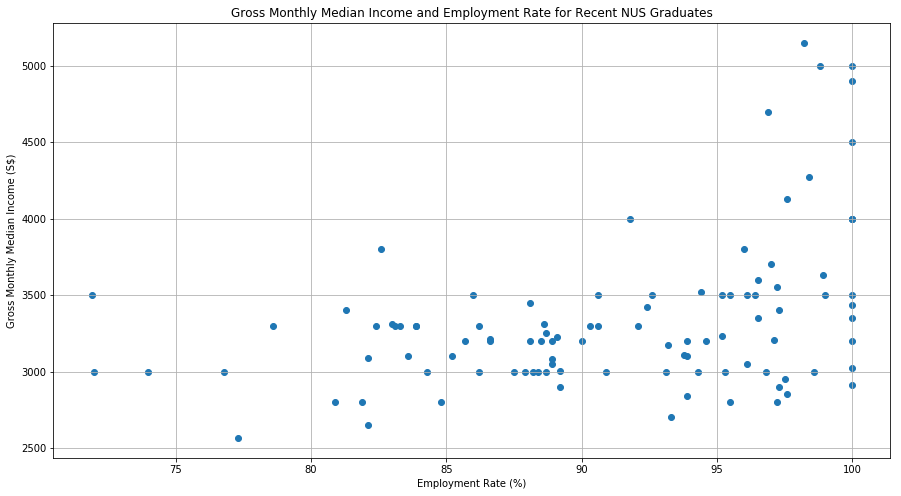

In [79]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.scatter(df_dataset.employment_rate_overall, df_dataset.gross_monthly_median)

ax.set(title='Gross Monthly Median Income and Employment Rate for Recent NUS Graduates',
       xlabel='Employment Rate (%)',
       ylabel='Gross Monthly Median Income (S$)')
ax.grid()

Inspecting the plot above, we can roughly make out a curve through it.

### 2. Feature selection
    
#### Inputs

|Feature|Description|Column name|Transformation before model input?|
|--|--|--|
|$x_1$|Overall Employment Rate (%)|employment_rate_overall|pd.to_numeric|

#### Outputs

|Output|Description|Truth column|Transformation from model output?|
|--|--|--|
|$\hat{y}$|Predicted Gross Monthly Medium Income S\$|$y$ = gross_monthly_median|None, output will stay numeric|

In [63]:
# Prepare the numpy arrays for use with sklearn
X = df_dataset.loc[:, 'employment_rate_overall']
print('X.shape:', X.shape)

y = df_dataset.loc[:, 'gross_monthly_median']
print('y.shape:', y.shape)

X.shape: (103,)
y.shape: (103,)


### 3. Model creation and training, and validation

In this section, we will
1. Shuffle and then split dataset into train and test
2. Perform feature scaling
3. Train and validate our models

### Dataset shuffling and train-test-split

In a previous workshop, we did the randomization and train-test split manually. 

Turns out, [sklearn.model_selection.train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) can do this for us.

In [64]:
from sklearn.model_selection import train_test_split

# train-test split, witholding 15% for test data
# shuffle=True is the default
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

X_train.head() # view the shuffled dataset

237     96.0
52      74.0
154     76.8
65     100.0
134     77.3
Name: employment_rate_overall, dtype: float64

### Feature scaling

Since we are using Stochastic Gradient Descent, we are recommended to scale the features between [0, 1] or [-1, 1].
- See [Tips on Practical Use for SGDRegressor](http://scikit-learn.org/stable/modules/sgd.html#tips-on-practical-use).

- Scaling subtracts the mean and divides by the standard deviation
- We will scale both the input and output values, using [sklearn.preprocessing.StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)
- In both cases (input and output), the mean and standard deviation will be based on the training set only. This way we don't look at the test set. 

In [65]:
from sklearn.preprocessing import StandardScaler

# We train the scaler based on the training set, and use
# it for both the training and test sets
#
# Reason: the test set shouldn't pollute the dataset
x_scaler = StandardScaler()
x_scaler.fit(X_train.values.reshape(-1, 1)) # must be 2D array
X_train_scaled = x_scaler.transform(X_train.values.reshape(-1, 1))
X_test_scaled = x_scaler.transform(X_test.values.reshape(-1, 1))

y_scaler = StandardScaler()
y_scaler.fit(y_train.values.reshape(-1, 1))
y_train_scaled = y_scaler.transform(y_train.values.reshape(-1, 1))[:, 0]
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))[:, 0]

In [66]:
X_train.head() # before scaling

237     96.0
52      74.0
154     76.8
65     100.0
134     77.3
Name: employment_rate_overall, dtype: float64

In [67]:
X_train_scaled[:5] # after scaling (showing first 5 values)

array([[ 0.70952083],
       [-2.38079585],
       [-1.98748282],
       [ 1.27139659],
       [-1.91724835]])

In [68]:
y_train.head() # before scaling

237    3800.0
52     3000.0
154    3000.0
65     3025.0
134    2565.0
Name: gross_monthly_median, dtype: float64

In [69]:
y_train_scaled[:5] # after scaling (showing first 5 values)

array([ 0.85394711, -0.67974023, -0.67974023, -0.6318125 , -1.51368272])

### Underfit Model: First Order Linear Regressor

For the first order linear regressor, we'll use `sklearn.linear_model.SGDRegressor` with the dataset above.

In [70]:
from sklearn.linear_model import SGDRegressor

# help me obi wan
SGDRegressor?

In [82]:
model = SGDRegressor(verbose=1,
                     loss='squared_loss', # mean squared loss
                     penalty='none', # no regularization
                     max_iter=100,
                     tol=1e-3, # stopping condition
                     eta0=0.01, # initial learning rate
                     learning_rate='invscaling') # learning rate schedule
%time model.fit(X_train_scaled, y_train_scaled)

print('Coefficient', model.coef_)
print('Intercept', model.intercept_)

-- Epoch 1
Norm: 0.15, NNZs: 1, Bias: -0.002270, T: 92, Avg. loss: 0.470901
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.21, NNZs: 1, Bias: -0.002402, T: 184, Avg. loss: 0.441645
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.26, NNZs: 1, Bias: -0.001054, T: 276, Avg. loss: 0.429008
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.29, NNZs: 1, Bias: -0.001870, T: 368, Avg. loss: 0.421981
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.32, NNZs: 1, Bias: -0.001010, T: 460, Avg. loss: 0.417702
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.34, NNZs: 1, Bias: -0.000839, T: 552, Avg. loss: 0.415062
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.35, NNZs: 1, Bias: -0.000510, T: 644, Avg. loss: 0.413369
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.36, NNZs: 1, Bias: -0.000246, T: 736, Avg. loss: 0.412269
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.37, NNZs: 1, Bias: -0.000534, T: 828, Avg. loss: 0.411530
Total training time: 0.00 se

#### Model Validation

Let's validate our model's performance by computing metrics and plotting the linear model.

In [83]:
from sklearn.metrics import mean_squared_error, r2_score

pred_scaled = model.predict(X_test_scaled)
print('Truth:', y_test_scaled)
print('Predictions:', pred_scaled)

# Compute metrics
print('MSE:', mean_squared_error(y_test_scaled, pred_scaled))
print('R2:', r2_score(y_test_scaled, pred_scaled))

Truth: [-0.34424612 -0.2963184  -0.10460748  0.27881436 -0.48802931 -0.28098152
 -0.96730661 -0.67974023 -0.2963184  -0.67974023  0.47052527]
Predictions: [ 0.11771491 -0.05037943 -0.40232695  0.42238589  0.15448554  0.32257988
  0.34884462 -0.16069134 -0.12917365  0.17549734  0.29106219]
MSE: 0.3594088006745909
R2: -1.2752429204603808


#### Model Visualization

We'll visualize the entire dataset (train + test), by plotting the data as a sactter plot, and the linear function as a curve or line.

The model needs to be called with pre- and post-processing stages:
1. Scale the input
2. Call `predict`
3. Unscale the output

In both steps, we'll use the already-fitted scalers from previously. This ensures that the pre- and post-processing matches exactly with how the model was trained.

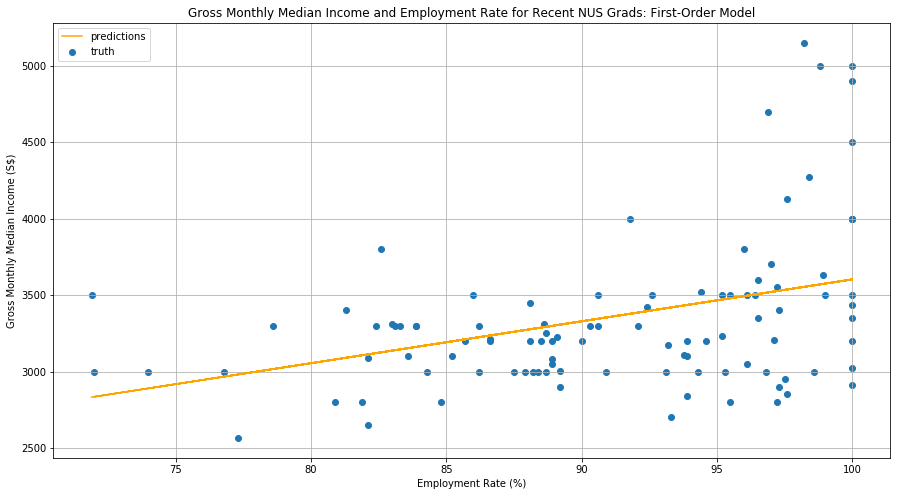

In [84]:
# First, call the model in 3 stages
# 1. Pre-process the input
X_scaled = x_scaler.transform(X.values.reshape(-1, 1))

# 2. Predict
y_pred_scaled = model.predict(X_scaled)

# 3. Post-process the output
y_pred = y_scaler.inverse_transform(y_pred_scaled)

# Finally, plot dataset and predictions
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(X.values, y, label='truth')
ax.plot(X.values, y_pred, label='predictions', color='orange')

ax.set(title='Gross Monthly Median Income and Employment Rate for Recent NUS Grads: First-Order Model',
       xlabel='Employment Rate (%)',
       ylabel='Gross Monthly Median Income (S$)')

ax.grid()
ax.legend()

### Overfit Attempt: Polynomial Regression

Now that we've seen how poorly an underfit model does, let's go to the other extreme.

To generate polynomial features from x (Employment Rate), we use [sklearn.preprocessing.PolynomialFeatures](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [86]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(12)
poly.fit(X_train.values.reshape(-1, 1))

X_train_poly = poly.transform(X_train.values.reshape(-1, 1))
X_test_poly = poly.transform(X_test.values.reshape(-1, 1))

# Scale the features back to SGD happy ranges ([-1, 1])
x_scaler_poly = StandardScaler()
x_scaler_poly.fit(X_train_poly)
X_train_poly_scaled = x_scaler_poly.transform(X_train_poly)
X_test_poly_scaled = x_scaler_poly.transform(X_test_poly)

In [87]:
model = SGDRegressor(verbose=1,
                     loss='squared_loss', # mean squared loss
                     penalty='none', # no regularization
                     max_iter=100,
                     tol=1e-4, # stopping condition
                     eta0=0.01, # initial learning rate
                     learning_rate='invscaling') # learning rate schedule
%time model.fit(X_train_poly_scaled, y_train_scaled)

print('Coefficients', model.coef_)
print('Intercept', model.intercept_)

-- Epoch 1
Norm: 0.13, NNZs: 12, Bias: 0.002526, T: 92, Avg. loss: 0.419921
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.17, NNZs: 12, Bias: 0.001874, T: 184, Avg. loss: 0.401399
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.16, NNZs: 12, Bias: 0.004332, T: 276, Avg. loss: 0.398502
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.18, NNZs: 12, Bias: 0.003486, T: 368, Avg. loss: 0.393796
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.18, NNZs: 12, Bias: 0.003998, T: 460, Avg. loss: 0.395448
Total training time: 0.00 seconds.
Convergence after 5 epochs took 0.00 seconds
Wall time: 3.99 ms
Coefficients [ 0.         -0.0014296   0.0073315   0.01597275  0.02444039  0.03269294
  0.04069966  0.04843882  0.05589599  0.06306248  0.06993396  0.07650943
  0.08279037]
Intercept [0.00399754]


### Exercise: Model Validation and Visualization

Follow the pattern above to validate and visualize the new model.

This means two tasks:
1. Computing metrics
2. Plotting the curve (hint: use a scatter plot for both)

In [77]:
# Compute metrics
# Your code here

pred_scaled = model.predict(X_test_poly_scaled)
print('Truth:', y_test_scaled)
print('Predictions:', pred_scaled)

# Compute metrics
print('MSE:', mean_squared_error(y_test_scaled, pred_scaled))
print('R2:', r2_score(y_test_scaled, pred_scaled))

Truth: [-0.34424612 -0.2963184  -0.10460748  0.27881436 -0.48802931 -0.28098152
 -0.96730661 -0.67974023 -0.2963184  -0.67974023  0.47052527]
Predictions: [ 0.03807893 -0.19197773 -0.51343667  0.64845867  0.09713011  0.41546793
  0.47328372 -0.31272734 -0.28036707  0.1324516   0.3491724 ]
MSE: 0.37935695858766644
R2: -1.4015250398263008


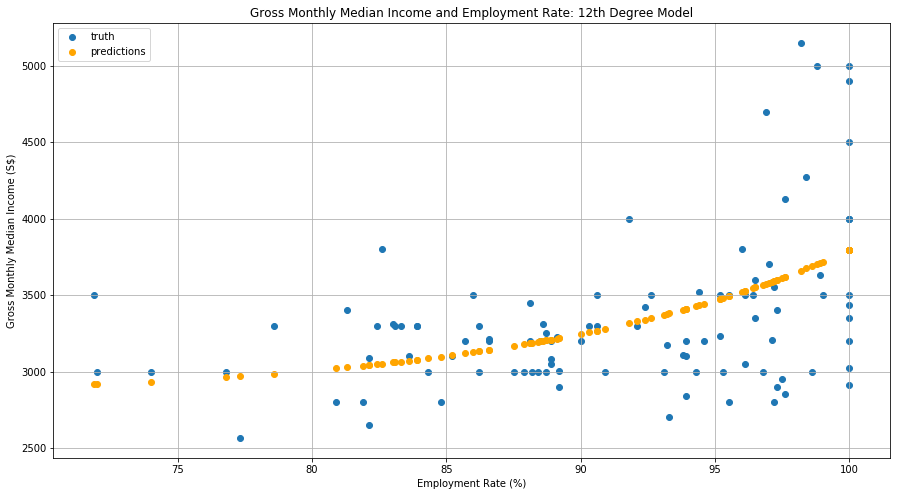

In [88]:
# Plot curve
# Your answer here

# First, call the model in 3 stages
# 1. Pre-process the input
X_poly = poly.transform(X.values.reshape(-1, 1))
X_poly_scaled = x_scaler_poly.transform(X_poly)

# 2. Predict
y_pred_scaled = model.predict(X_poly_scaled)

# 3. Post-process the output
y_pred = y_scaler.inverse_transform(y_pred_scaled)

# Finally, plot dataset and predictions
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(X.values, y, label='truth')
ax.scatter(X.values, y_pred, label='predictions', color='orange')

ax.set(title='Gross Monthly Median Income and Employment Rate: 12th Degree Model',
       xlabel='Employment Rate (%)',
       ylabel='Gross Monthly Median Income (S$)')

ax.grid()
ax.legend()

### Learning Curves for Underfit/Overfit Detection

Even with the above polynomial curve, it's hard to tell if we are truly overfitting.

The standard practice to determine model fit is to plot learning curves of the training scores and test scores during training iterations.

Let's compare the learning curves for both the linear and polynomial case.

Reference: http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

## Regularization

## Cross Validation

### Reading List

|Material|Read it for|URL|
|--|--|--|
|Chapter 8, Pages 290-296|Stochastic Gradient Descent Theory|http://www.deeplearningbook.org/contents/optimization.html|
|Chapter 5, Pages 107-119|Capacity, Overfitting and Underfitting|http://www.deeplearningbook.org/contents/ml.html|
|scikit-learn: Section 1.5 Stochastic Gradient Descent|User guide for sklearn with SGD|http://scikit-learn.org/stable/modules/sgd.html|

Note: in the book, the section on SGD is actually talking about "Minibatch SGD"